# Exercise 1 - The Right Fit

In this exercise you will learn about the goodness of fit to practically evaluate a set of statistical models. For this you will explore a new type of regression - the polynomial regression. With polynomial regression it is possible to fit a nonlinear relationship between the dependent and the independent variables, although the problem of estimating the parameters is linear and can be solved with the standard OLS approach.

The idea here is to learn a bunch of (polynomial) models on the same data set and explore the meaning of over- and underfitting the data. Key questions:

- What is overfitting and underfitting?
- How to detect it?
- How to prevent it?

## Setup

In [1]:
import numpy as np
data = np.genfromtxt("train.csv", delimiter=",")
X = data[:,0]
Y = data[:,1]

Text(0, 0.5, 'Y')

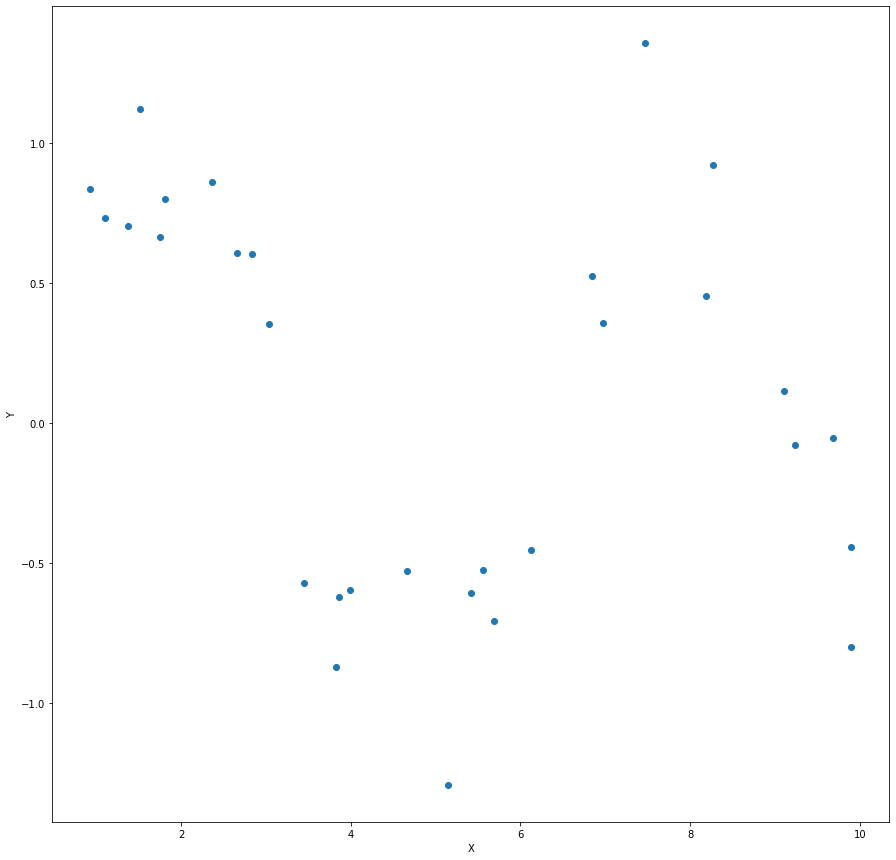

In [2]:
import numpy as np
from matplotlib import pyplot as plt
# for inline visualizations
%matplotlib inline

# with this you can adjust the figure size
plt.rcParams['figure.figsize'] = [15, 15]

plt.scatter(X, Y)
plt.xlabel("X")
plt.ylabel("Y")

## Polynomial Regression
As you can see, the relationship between the dependent variable and the explanatory one does not seem to be linear and the standard linear regression from the lecture will not perform well. One way to account for such a non linear relationship is called [polynomial regression](https://en.wikipedia.org/wiki/Polynomial_regression). For a scalar explanatory variable `X` and a scalar dependent variable `Y`, the data generation model is:

$$
Y_i = \theta_0 + \theta_1 * X_i + \theta_2 X_i^2 + \dots + \theta_d X_i^d  + \epsilon_i = \sum_{j=0}^d \theta_i * X_i^j + \epsilon_i
$$
where $d$ is called degree. Although the relationship between the dependent and the explanatory variable is non linear, the problem of estimating the parameters $\theta$ is linear. By vectorizing the model, this becomes obvious:

$$
\begin{bmatrix}
    Y_1 \\
    Y_2 \\
    \vdots \\
    Y_n
\end{bmatrix}
=
\begin{bmatrix}
    1 & X_1 & X_1^2 & \dots & X_1^d \\
    1 & X_2 & X_2^2 & \dots & X_2^d \\
    \vdots & \vdots & \vdots &\ddots \\
    1 & X_n & X_n^2 & \dots & X_n^d
\end{bmatrix}
\begin{bmatrix}
    \theta_0 \\
    \theta_1 \\
    \vdots \\
    \theta_d
\end{bmatrix}
+
\begin{bmatrix}
    \epsilon_1 \\
    \epsilon_2 \\
    \vdots \\
    \epsilon_n
\end{bmatrix}
$$

This linear model can now be fit with the ordinary-least-squares MLE approach.

### Task 1
Implement a polynomial function `poly` to evaluate polynomials of arbitrary degree. It should take two arguments:
- `X` : data of type scalar or of type iterable
- `theta`: the parameter vector
and returns the predictions for `X`

Hints: Verify the correctness of your implementation!

In [3]:
def poly(x, theta):
    return np.sum(t*x**i for i,t in enumerate(theta))

### Task 2
Implement a function `fit_poly` to fit a polynomial model with ordinary least squares. Regularize your maximum-likelihood problem with the L2-norm of the parameters (see `Ridge regression` in the lecture notes).

Hints:
- the only difference to the ridge regression from the lecture is the structure of the design matrix
- be aware of numerical pitfalls!

In [4]:
def fit_poly(x, y, degree, c=0):
    D = np.zeros((degree + 1, len(x)))
    for i in range(degree + 1):
        D[i,:] = x**i
    #theta = np.linalg.inv((D.dot(D.T)) + c * np.eye(len(D))).dot(D.dot(y))
    theta = np.linalg.solve((D.dot(D.T)) + c * np.eye(len(D)), D.dot(Y))
    return theta

## Visualisation
Next we want to fit a series of models of multiple degrees and visualise them alongside the data.

In [5]:
# model degrees
model_degrees = [0, 1, 2, 3, 6, 9, 12, 15, 18, 21]

# fit models
coeffs = [(degree, fit_poly(X, Y, degree, c=.0)) for degree in model_degrees]

### Task 3
Visualise the 10 models alongside the data by plotting each model in a separate plot

Hints:
- use the pyplot.subplot feature to fit multiple plots into one figure
- if you had problems with the previous tasks, work with the numpy.polynomial module

In [6]:
def plot_coeffs(coeffs, X, Y):
    nrows = (len(coeffs) + 1) // 2
    ncols = 2
    plt.subplots(nrows=nrows, ncols=ncols)
    for i, (degree, coeff) in enumerate(coeffs):
        ax = plt.subplot(nrows, ncols, i+1)
        ax.set_title("Polynomial model of degree {}".format(degree))
        ax.scatter(X, Y)
        X_p = np.linspace(min(X), max(X), 100)
        ax.plot(X_p, poly(X_p, coeff), color="r")
    plt.tight_layout()

<ipython-input-3-b688e9fcb6ac>:2: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  return np.sum(t*x**i for i,t in enumerate(theta))
<ipython-input-3-b688e9fcb6ac>:2: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  return np.sum(t*x**i for i,t in enumerate(theta))
<ipython-input-3-b688e9fcb6ac>:2: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  return np.sum(t*x**i for i,t in enumerate(theta))
<ipython-input-3-b688e9fcb6ac>:2: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin i

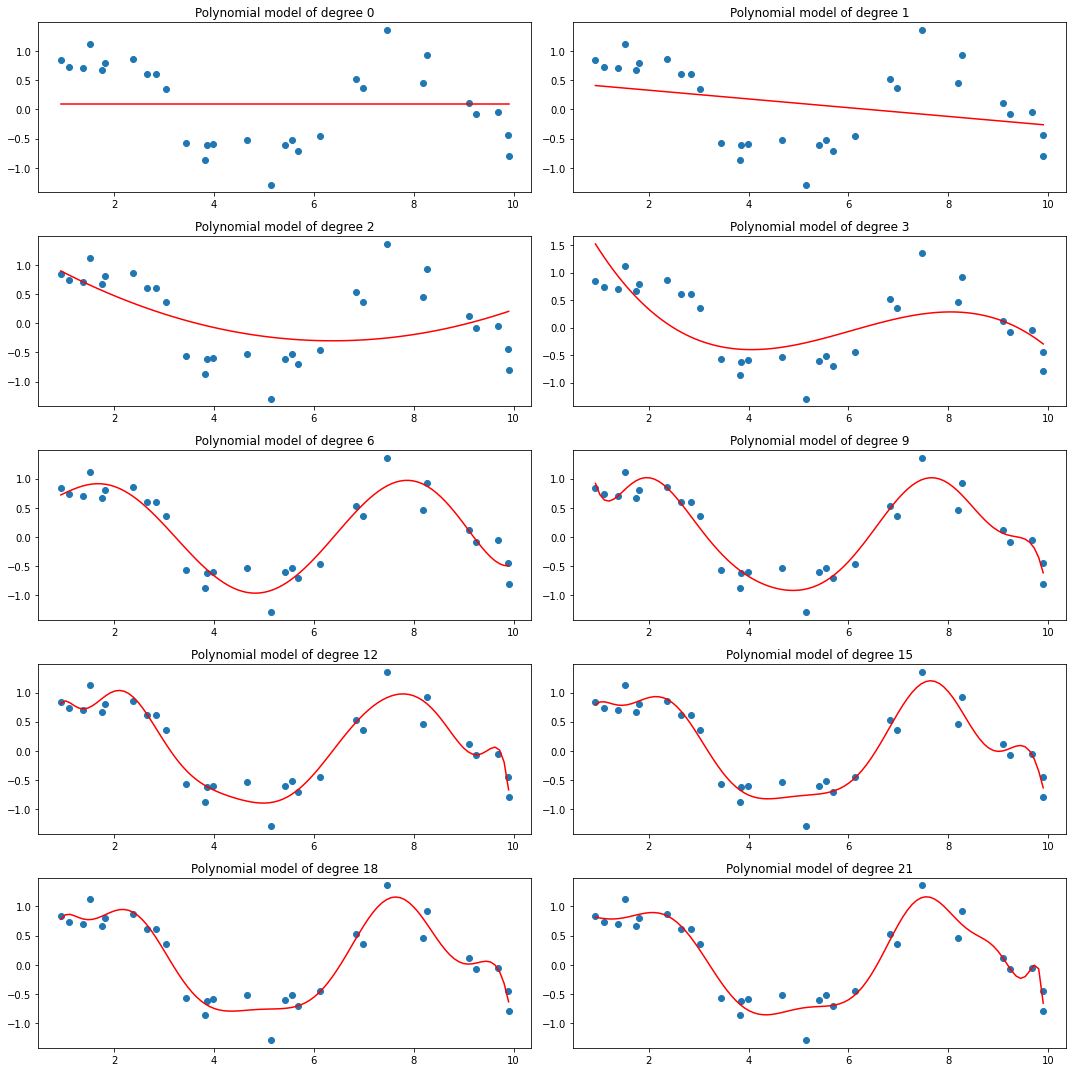

In [7]:
plot_coeffs(coeffs, X, Y)

## Model Validation
To evaluate the models, we need a measure of fit, that tells us how well the model fits the data. The standard measure for continuously distributed data is the "root mean squared error" (RMSE). Given the dependent variable $Y \in \mathbb{R}^n$ and its prediction $\hat{Y} = f(X, \theta) \in \mathbb{R}^n$, the RMSE is defined to be:

$$
RMSE(Y, \hat{Y}) = \sqrt{\frac{1}{n} \sum_{i}^n (Y_i - \hat{Y}_i)^2}
$$

More complex models will in general yield better results on the data that was used to train them, but the quality of the model is determined by its "generalizability" ("how well does the model perform on data that it has not seen before?"). This concept of splitting the data is called <a href="https://en.wikipedia.org/wiki/Cross-validation_(statistics)">cross-validation</a>. In our case, it is sufficient to split the data in two sets:
- Training set (`train.csv`)
- Testing set (`test.csv`)

### Task 4
Implement a `rmse` function that returns the RMSE of a vector of observations $Y$ and its predictions $\hat{Y}$

In [8]:
def rmse(Y, Y_hat):
    return np.sqrt(np.sum((Y - Y_hat)**2) / len(Y))

### Task 5
- fit 20 polynomial models of degree 0 to 19 on the training data set.
- calculate the RMSE of all the models on the train data set. This error is called "training error"
- calculate the RMSE of all the models on the test data set. This error is called "validation error" or "cross-validation error"

In [9]:
data_ho = np.genfromtxt("test.csv", delimiter=",")
X_ho = data_ho[:,0]
Y_ho = data_ho[:,1]

In [10]:
# learn models
model_degrees = np.arange(0, 20, 1)
coeffs = [(degree, fit_poly(X, Y, degree, c=1)) for degree in model_degrees]

# residual sum of squares
RMSEs = [rmse(Y, poly(X, coeff)) for degree, coeff in coeffs]
RMSEs_ho = [rmse(Y_ho, poly(X_ho, coeff)) for degree, coeff in coeffs]

<ipython-input-3-b688e9fcb6ac>:2: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  return np.sum(t*x**i for i,t in enumerate(theta))


### Task 6
Now visualize the training RMSE and testing RMSE in dependence of the degree of the models.

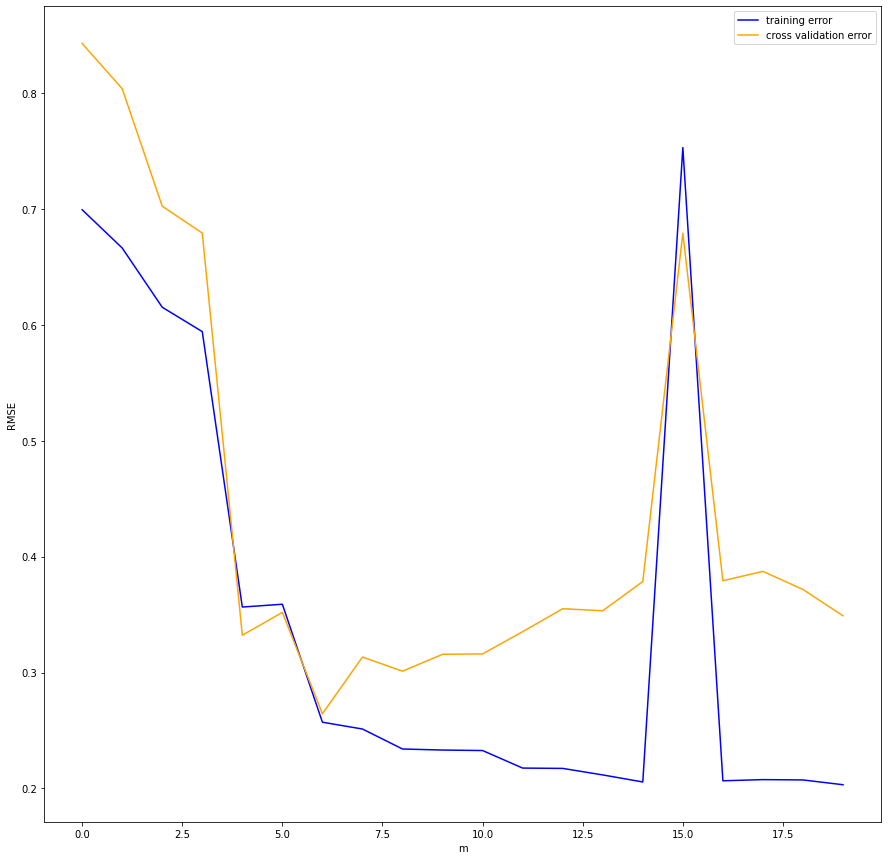

In [11]:
plt.plot(model_degrees, RMSEs, color="b", label="training error")
plt.plot(model_degrees, RMSEs_ho, color="orange", label="cross validation error")
plt.xlabel("m")
plt.ylabel("RMSE")
plt.legend()

## Overfit and Underfit
From the two curves of the previously generated figure you can determine the fit of the models.
- Underfitting: training and cross validation error are high
- Overfitting: training error is low, cross validation is high
- Just right: training and cross validation errors are low

### Task 7
List briefly:
- which models underfit
- which models overfit
- which models fit just right

# Regularization with diamonds

In exercise1, you fit a linear model with the diamonds data set. One way to enforce the right fit is by using regularization.

### Datset
- price: price in US dollars (\$326.0 - \$18823.0)
- carat: weight of the diamond (0.2 - 5.01)
- cut: quality of the cut (Fair, Good, Very Good, Premium, Ideal)
- color: diamond colour, from J (worst) to D (best)
- clarity: a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))
- x: length in mm (0--10.74)
- y: width in mm (0--58.9)
- z: depth in mm (0--31.8)
- depth: total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79)
- table: width of top of diamond relative to widest point (43--95

In [12]:
import pandas as pd
data = pd.read_csv("diamonds.csv")
data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [13]:
data.dtypes

carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
price        int64
x          float64
y          float64
z          float64
dtype: object

## Data transformations

The following table lists data transformations in dependence of the feature type. They can be used to include `discrete` features into a regression model.

<table>
  <tr>
    <th>Feature type</th>
    <th>Transformation</th>
  </tr>
  <tr>
    <td>Nominal: categorical, unordered<br>features (True or False)</td>
    <td>One-hot encoding (0, 1)</td>
  </tr>
  <tr>
    <td>Ordinal: categorical, ordered<br>features (movie ratings)</td>
    <td>Ordinal encoding (0, 1, 2, 3, ...)</td>
  </tr>
</table>

### Task 8
In the diamonds set there are several ordinal variables. Encode them corretly such that they can be used for our regression.

Hint: 
- There are multiple pre-implemented ways to do that. E.g. (sklearn.feature_extraction.DictVectorizer, sklearn.preprocessing.LabelEncoder, ...)
- The easiest way to do that may be the pandas.dataframe.map() function

In [14]:
# mappings
cut_map = {'Fair': 0, 'Good': 1, 'Very Good': 2, 'Premium': 3, 'Ideal': 4}
color_map = {'D': 6, 'E': 5, 'F': 4, 'G': 3, 'H': 2, 'I': 1, 'J': 0}
clarity_map = {'I1': 0, 'SI2': 1, 'SI1': 2, 'VS2': 3, 'VS1': 4, 'VVS2': 5, 'VVS1': 6, 'IF': 7}

data['cut'] = data['cut'].map(cut_map)
data['color'] = data['color'].map(color_map)
data["clarity"] = data["clarity"].map(clarity_map)

### Task 9
Split the dataset into a train set (80%) and a test set (20%). 

Hint: You can use the `sklearn.model_selection.train_test_split` function.

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(data.drop(["price"], axis=1), data["price"], test_size=0.3)

### Task 10
Fit a linear model with L2 regularization with the train set.

Hint: You can use the `sklearn.linear_model.Ridge` class for that.

In [17]:
from sklearn.linear_model import Ridge
rr = Ridge(alpha=0.5)
rr.fit(X_train, Y_train)

Ridge(alpha=0.5)

### Task 11
Calculate the RMSE on the train set and on the test set. Compare them.

In [18]:
Y_train_predict = rr.predict(X_train)
Y_test_predict = rr.predict(X_test)
print("RMSE_train", rmse(Y_train, Y_train_predict))
print("RMSE_test", rmse(Y_test, Y_test_predict))

RMSE_train 1223.5820314345956
RMSE_test 1200.3019716965905


## Hyperparameters (BONUS TASKS)

Finding the right regularization parameter is a optimization problem on its on.

In [19]:
alphas = np.linspace(-50, 50, 100)
rmses = []
for alpha in alphas:
    rr = Ridge(alpha=alpha)
    rr.fit(X_train, Y_train)
    Y_test_predict = rr.predict(X_test)
    rmses.append(rmse(Y_test, Y_test_predict))

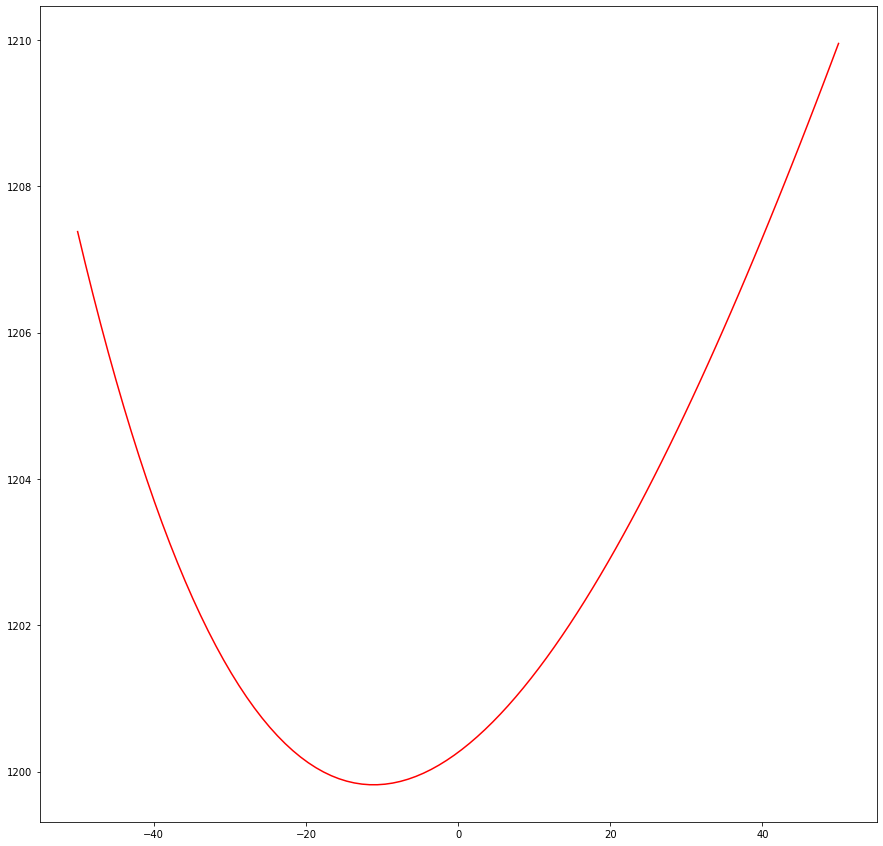

In [20]:
plt.plot(alphas, rmses, color="red")

### Task 11 (ONLY BONUS)
- implement a function `alpha_loss` that takes the regularization parameter $\alpha$ as argument and returns the RMSE of the associated model for the test data set.
- minimize this function with respect to the regularization parameter.
- which parameter yields the perfect fit?

Hint: Check out `scipy.optimize.minimize` function.

In [21]:
def alpha_loss(alpha):
    rr = Ridge(alpha=alpha)
    rr.fit(X_train, Y_train)
    Y_test_predict = rr.predict(X_test)
    return rmse(Y_test, Y_test_predict)
    

In [22]:
from scipy.optimize import minimize
res = minimize(fun=alpha_loss, x0=np.array([0]), jac=False)

In [23]:
alpha = res.x
rr = Ridge(alpha=alpha)
rr.fit(X_train, Y_train)
Y_train_predict = rr.predict(X_train)
Y_test_predict = rr.predict(X_test)
print("RMSE_train", rmse(Y_train, Y_train_predict))
print("RMSE_test", rmse(Y_test, Y_test_predict))

RMSE_train 1224.0242892308756
RMSE_test 1199.8193171306932
